## Monte Carlo Integration

How would you calculate the area under the curve $x^2$ from $x=1$ to $x=2$?

Basically, we can solve the integral below to find the answer to this question:

$$\int_{1}^{2}x^2dx  =  \frac{x^3}{3} \Big|_1^2 = \frac{7}{3} = 2.333$$

Now, let's take a Monte Carlo approcah to the same question.

![monte carlo curve](img/monte_carlo_square.jpg)

- Calculate the overall area,
- Randomly sample points in the area,
- Multiply the fraction of the points below the curve by overall area.

**Calculating the overall area:**

In [1]:
x_min = 1
x_max = 2

def f(x):
    return x**2

y_min = min(0,f(x_min))
y_max = f(x_max)
overall_area = abs((x_max - x_min) * (y_max - y_min))

**Randomly sample points in the area:**

In [2]:
import numpy as np
X = np.random.uniform(low=x_min, high=x_max, size=100000)
Y = np.random.uniform(low=y_min, high=y_max, size=100000)

**Multiply the fraction of the points below the curve by overall area:**

In [3]:
result = (Y < X**2).sum() / X.shape[0] * overall_area
print('Result of the integral according to Monte Carlo simulation: ',
     result)

Result of the integral according to Monte Carlo simulation:  2.3398


In [4]:
import matplotlib.pyplot as plt
generic_X = np.linspace(x_min, x_max, 20)
generic_Y = f(generic_X)
plt.scatter(X[Y < f(X)], Y[Y < f(X)], color='green', s=.1)
plt.scatter(X[Y > f(X)], Y[Y > f(X)], color='blue', s=.1)
_ = plt.plot(generic_X, generic_Y, color='red', linewidth=3)


Increasing the number of sample points will increase the accuracy of solution.

### Integrating a Simple Function

This is a simple exercise introducing the concept of Monte Carlo Integration.

Here we will evaluate a simple integral $$\int_{0}^{1} xe^xdx$$. 

We know that the exact answer is 1, but simulation will give us an approximate solution, so we can expect an answer close to 1. As we saw in the video, it's a simple process. For a function of a single variable f(x):

1. Get the limits of the x-axis `(xmin,xmax)` and y-axis `(max(f(x)),min(min(f(x)),0))`.
2. Generate a number of uniformly distributed point in this box.
3. Multiply the area of the box `((max(f(x)−min(f(x))×(xmax−xmin))` by the fraction of points that lie below `f(x)`.


Upon completion, you will have a framework for handling definite integrals using Monte Carlo Integration.

In [5]:
# Define the sim_integrate function
def sim_integrate(func, xmin, xmax, sims):
    x = np.random.uniform(low=xmin, 
                          high=xmax, 
                          size=sims)
    y = np.random.uniform(low=min(0,min(func(x))),
                          high=max(func(x)), 
                          size=sims)
    area = (max(y) - min(y))*(xmax-xmin)
    result = area * sum(y < abs(func(x)))/sims
    return result


xmin = 0
xmax = 1
# Call the sim_integrate function and print results
result = sim_integrate(func = lambda x: x*np.e**x, xmin = 0, xmax = 1, sims = 5000)
print("Simulated answer = {}, Actual Answer = 1".format(result))

Simulated answer = 1.0054805149549355, Actual Answer = 1


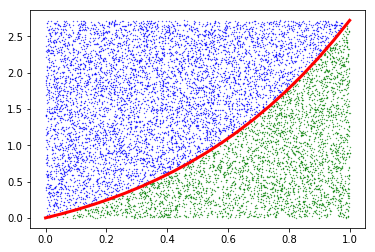

In [6]:
f_2 = lambda x: x*np.e**x
import matplotlib.pyplot as plt
X = np.random.uniform(low=xmin, high=xmax, size=10000)
Y = np.random.uniform(low=0, high=f_2(X).max(), size=10000)
generic_X = np.linspace(xmin, xmax, 20)
generic_Y = f_2(generic_X)
plt.scatter(X[Y < f_2(X)], Y[Y < f_2(X)], color='green', s=.1)
plt.scatter(X[Y > f_2(X)], Y[Y > f_2(X)], color='blue', s=.1)
_ = plt.plot(generic_X, generic_Y, color='red', linewidth=3)
